Model To Analyze and Predict Air Quality Index 

...Using Watson and Ibm Database db2 on Cloud...

Data set will include the types of pollutants present in the air like sulfur dioxide(SO2) nitrogen dioxide(NO2) and other such chemicals and in order to predict this indian air quality I will take the help of both Machine learning models which are the classification models as well as the regression models.



In [1]:
#importing Important Libraries used in Below code and Collected all libraries imported below
import numpy as np   #To perform numerical Calculations and scientific computing
import pandas as pd  #Helps in Data Structures creation and manipulation
import seaborn as sns#Seaborn Help in Visualization
import matplotlib.pyplot as plt #For Plotting of graphs 
import warnings   #To Remove and ignore the Warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split #helps in splitting of data
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix


Step 1) To Import the Dataset and COnvert it to Dataframe

In [2]:
dataset=pd.read_csv("data.csv/data.csv",encoding='ISO-8859-1') #To Read The Dataset
dataset.head() # in order to preview first 5 rows of the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


Now Our task is to analyse the Dataset


In [3]:
#here we get an overview of Rows and Column Num in our Dataset
print(f"Our DataSet have {dataset.shape[0]} Rows and {dataset.shape[1]} Coloumns")


Our DataSet have 435742 Rows and 13 Coloumns


In [4]:
#to analyze Dataset,We have to check the names of the columns in our dataset
dataset.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [5]:
'''Using Describe method to describe my dataset with column names and as you can see it will 
give you most of the info out of it the change in value of counts depicts presence of null 
values'''
dataset.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [6]:
'''In order to see the count of null values i have used the isnull func then using sum 
func to sum all thhe null values present  in the data'''
dataset.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

Graph Visualization of Data

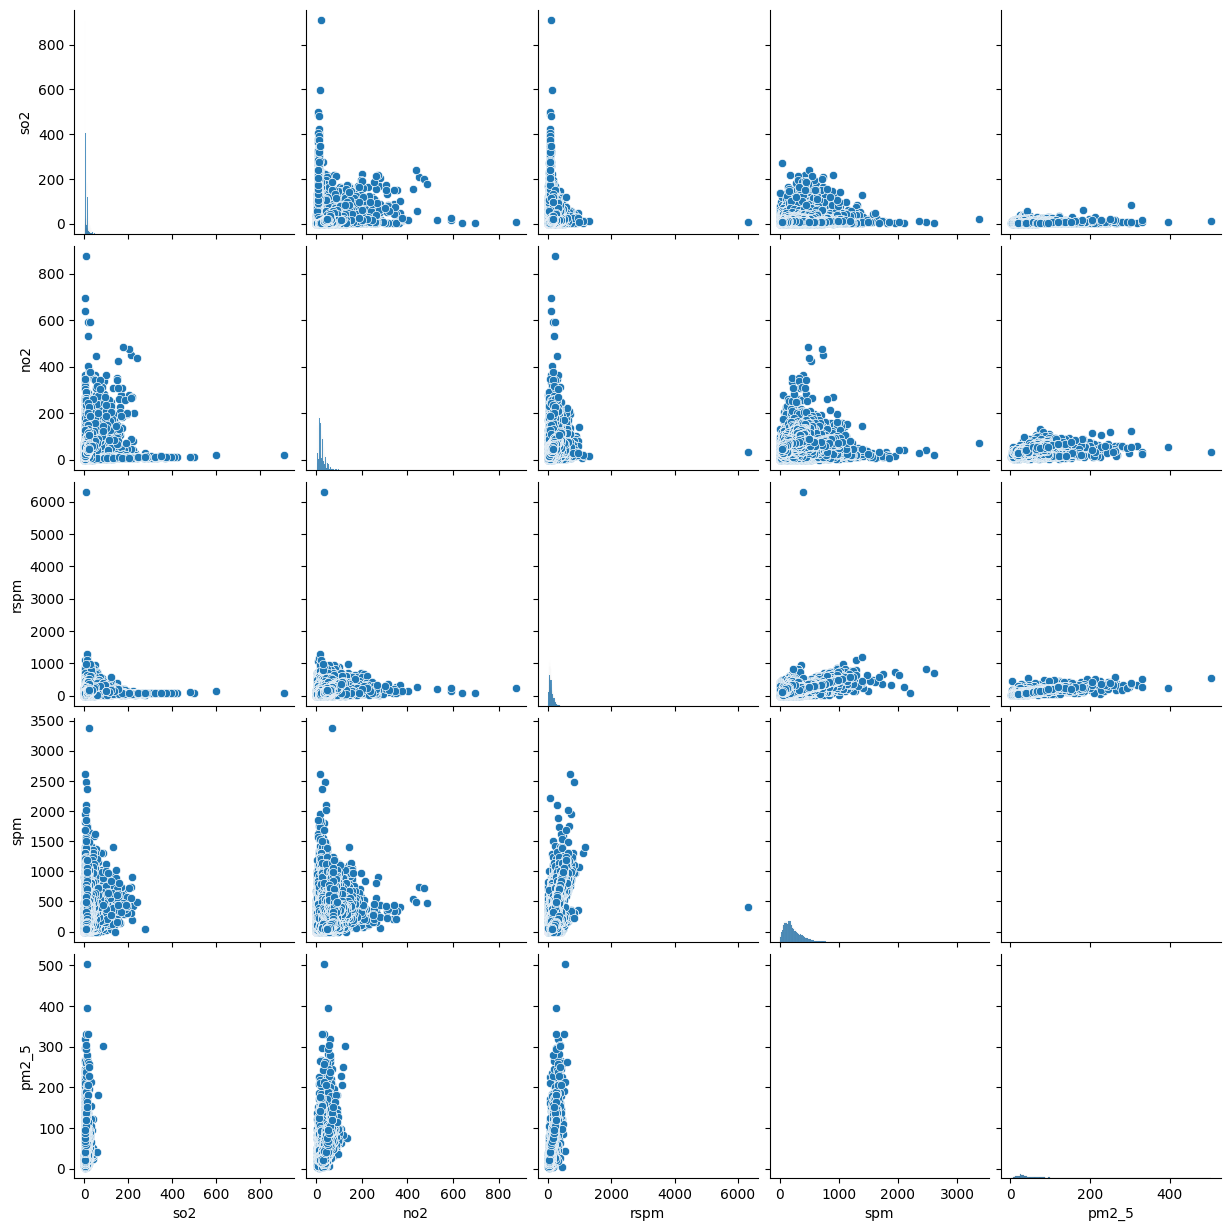

In [7]:
#to get the increase in level of pm due to various gasses Individually
sns.pairplot(data=dataset)

In [8]:
dataset['state'].value_counts()
#this is used to know the frequency of the occurence of various states

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

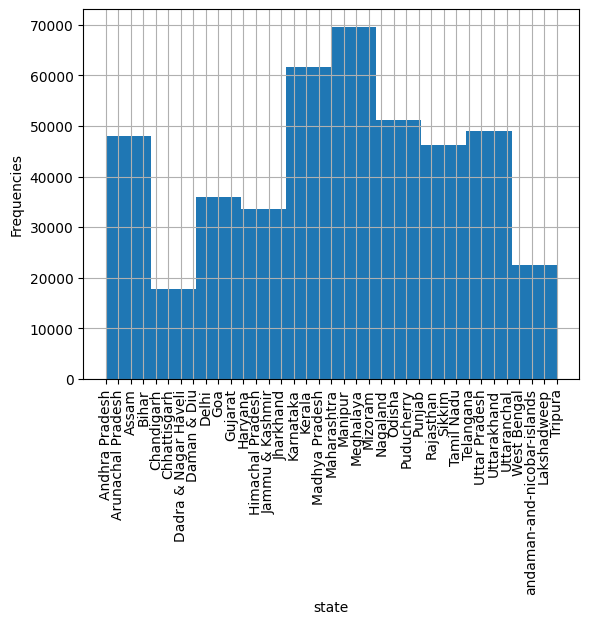

In [9]:
#Then  Represented this ocurrence of various States for visualization
plt.xticks(rotation=90)
dataset.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

In [10]:
#Counting The Various types and counts of areas used
dataset['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

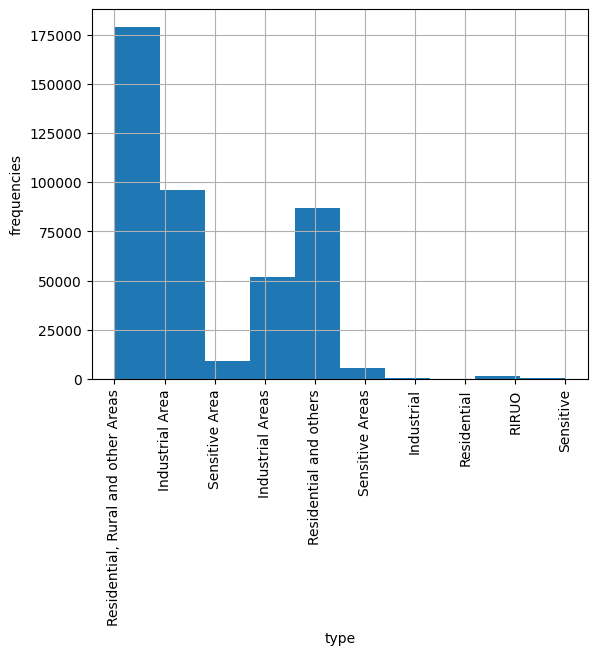

In [11]:
plt.xticks(rotation=90) # to rotate x axes labels to 90 degree to avoid overlapping
dataset.type.hist()
plt.xlabel('type')
plt.ylabel('frequencies')
plt.plot


In [12]:
# #states with higher number of SO2 Concentration
# plt.figure(figsize=(25,12))
# plt.xticks(rotation=90)
# sns.barplot(x='state', y='so2',data=dataset)
#Have not used the above plotting technique as time taken by it is about 10sec 
#however instead of this i used the plotting techniques in ascending order which takes abt 0.2 sec and is more
#better

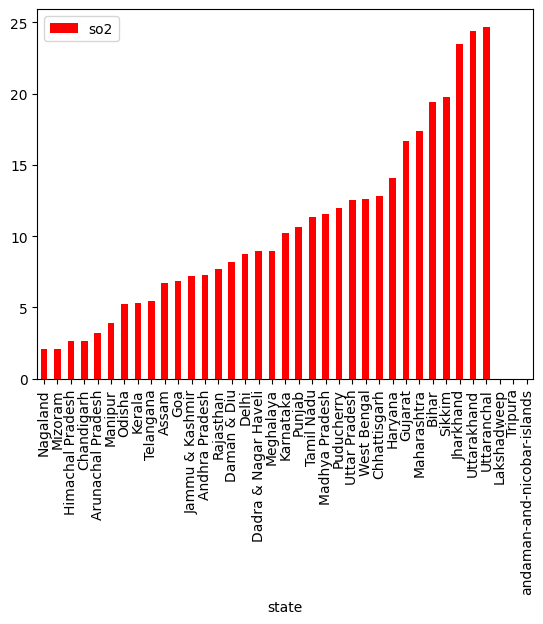

In [13]:
dataset[['so2', 'state']].groupby(["state"]).mean().sort_values(by="so2").plot.bar(color='Red')
plt.show() 
# Using the groupby function to get clear Picture Understanding and to sort values in an ascending order based on the x-axis, y-axis and its keys
# Analysing Data in Ascending Order for So2

In [14]:
# plt.figure(figsize=(25,12))
# plt.xticks(rotation=90)
# sns.barplot(x='state', y='so2',data=dataset)

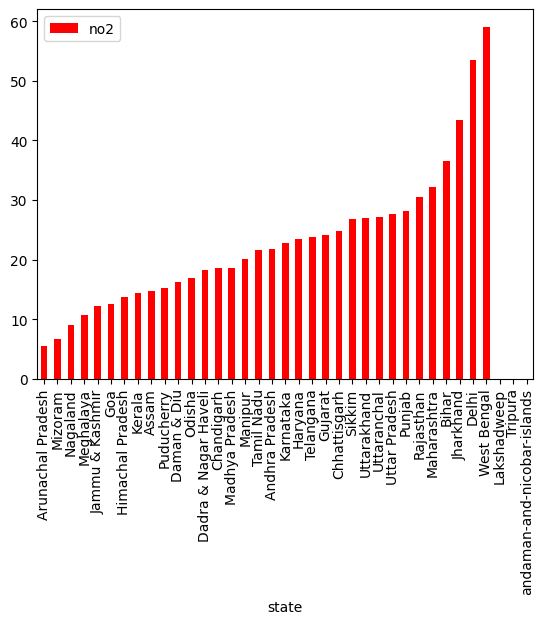

<Figure size 3000x1000 with 0 Axes>

In [15]:
dataset[['no2', 'state']] .groupby(["state"]).mean().sort_values(by="no2").plot.bar(color='Red')
plt.figure(figsize=(30,10))
plt.show() 
# Analysing Data in Ascending Order for NO2

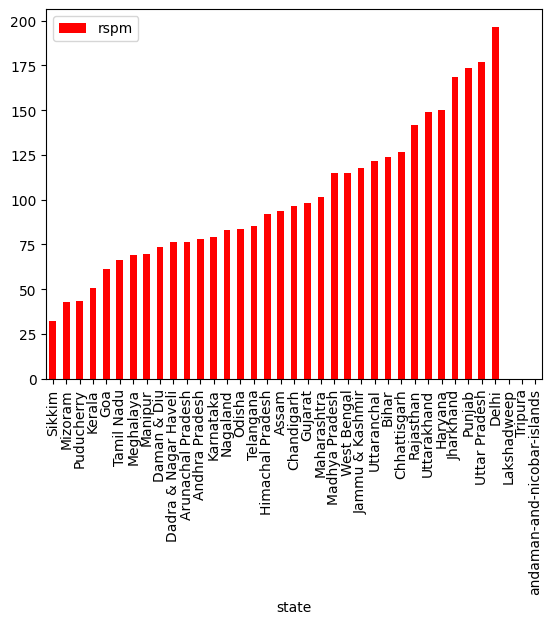

In [16]:
dataset[['rspm', 'state']] .groupby(["state"]).mean().sort_values(by="rspm").plot.bar(color='Red')
plt.show() 

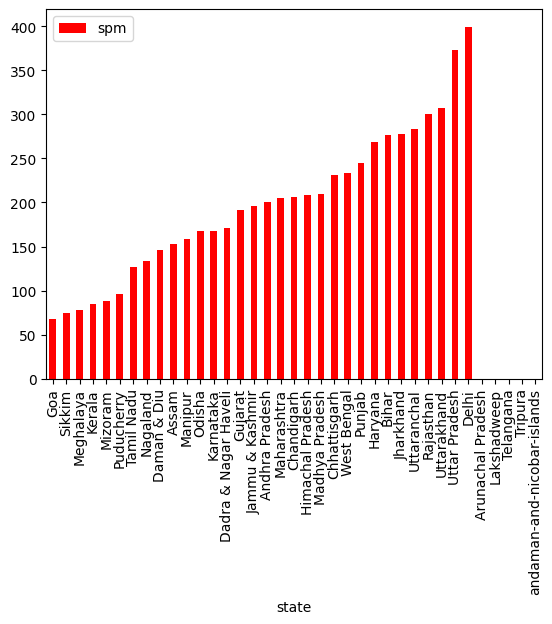

<Figure size 3000x5000 with 0 Axes>

In [17]:
dataset[['spm', 'state']] .groupby(["state"]).mean().sort_values(by="spm").plot.bar(color='Red')
a=plt.figure(figsize=(30,50)).show() 

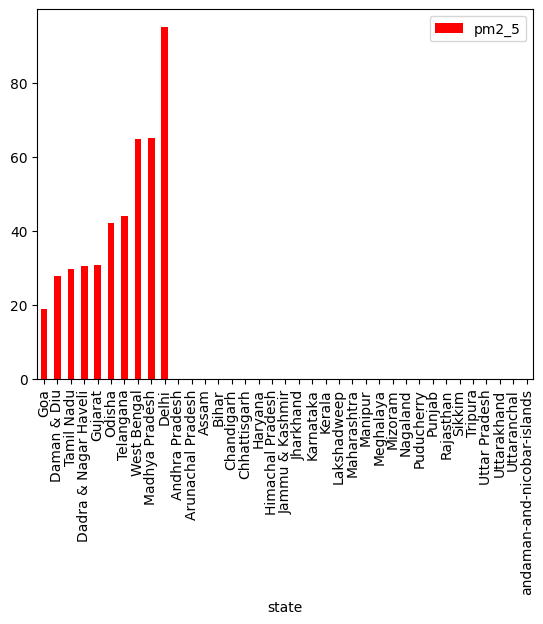

<Figure size 3000x5000 with 0 Axes>

In [18]:
dataset[['pm2_5', 'state']] .groupby(["state"]).mean().sort_values(by="pm2_5").plot.bar(color='Red')
a=plt.figure(figsize=(30,50)).show() 

..................Now Our Task Is to Make our code deployable for Machine Learning. But Here one of the major proglem is the null values . We cannot only removw them simply but we have to create a Algo on the basis of percentage of Missing values present on a particular Column.......................

In [19]:
null_val=dataset.isnull().sum().sort_values(ascending=False)
null_val

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [20]:
null_val_percent=(dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
percentage_of_missing_data=pd.concat([null_val,null_val_percent],axis=1,keys=['Total','Percent'])
percentage_of_missing_data

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


........Now our Main Work is to First Drop Some Unnessecary Columns..........

In [21]:
dataset.drop(['agency'], axis=1, inplace=True) 
dataset.drop(['stn_code'],axis=1,inplace=True)
dataset.drop(['date'],axis=1, inplace=True)
dataset.drop(['location_monitoring_station'], axis=1,inplace=True)

In [22]:
dataset.shape

(435742, 9)

In [23]:
dataset

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
435737,24-12-2015,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,29-12-2015,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dataset['location']=dataset["location"].fillna (dataset["location"].mode()[0])
dataset['type']=dataset['type'].fillna(dataset['type'].mode()[0])
#Null value Imputation for categorical data
dataset.fillna(0, inplace=True)
# Putting 0 in place of null values in numerocal data
dataset.isnull().sum()
#Now we have successfully imputed null values which were present in the dataset👇👇👇

sampling_date    0
state            0
location         0
type             0
so2              0
no2              0
rspm             0
spm              0
pm2_5            0
dtype: int64

In [25]:
dataset.shape

(435742, 9)

In [26]:
dataset

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
435737,24-12-2015,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,29-12-2015,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,0,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,0,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


Now Our Task is to Calculate Air Quality index 

In [27]:
#First we will use the formula for SO2 to calc Individual Pollutant Index
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    elif (so2>40 and so2<=80): 
        si=50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si=100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/300)
    elif (so2>1600):
        si= 400+(502-1600)*(100/800)
    return si
dataset['SOi']=dataset['so2'].apply(cal_SOi) 
dataSO2= dataset[['so2','SOi']]
dataSO2.head()
#calculating the individual pollutant index for so2 (sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [28]:
#First we will use the formula for NO2 to calc Individual Pollutant Index
def cal_NOi(no2):
    ni=0
    if (no2<=40):
        ni= no2*(50/40)
    elif (no2>40 and no2<=80): 
        ni=50+(no2-40)*(50/40)
    elif (no2>80 and no2<=380):
        ni=100+(no2-80)*(100/300)
    elif (no2>380 and no2<=800):
        ni= 200+(no2-380)*(100/420)
    elif (no2>800 and no2<=1600):
        ni= 300+(no2-800)*(100/300)
    elif (no2>1600):
        ni= 400+(502-1600)*(100/800)
    return ni
dataset['NOi']=dataset['no2'].apply(cal_NOi) 
dataNO2= dataset[['no2','NOi']]
dataNO2.head()
#calculating the individual pollutant index for no2  

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [29]:
#First we will use the formula for NO2 to calc Individual Pollutant Index
def cal_RSPMi(rspm):
    rpi=0
    if (rspm<=40):
        rpi= rspm*(50/40)
    elif (rspm>40 and rspm<=80): 
        rpi=50+(rspm-40)*(50/40)
    elif (rspm>80 and rspm<=380):
        rpi=100+(rspm-80)*(100/300)
    elif (rspm>380 and rspm<=800):
        rpi= 200+(rspm-380)*(100/420)
    elif (rspm>800 and rspm<=1600):
        rpi= 300+(rspm-800)*(100/300)
    elif (rspm>1600):
        rpi= 400+(502-1600)*(100/800)
    return rpi
dataset['RSPMi']=dataset['rspm'].apply(cal_RSPMi) 
dataRSPM= dataset[['rspm','RSPMi']]
dataRSPM.head()
#calculating the individual pollutant index for rspmi

,rspm,RSPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [30]:
#First we will use the formula for NO2 to calc Individual Pollutant Index
def cal_SPMi(spm):
    spi=0
    if (spm<=40):
        spi= spm*(50/40)
    elif (spm>40 and spm<=80): 
        spi=50+(spm-40)*(50/40)
    elif (spm>80 and spm<=380):
        spi=100+(spm-80)*(100/300)
    elif (spm>380 and spm<=800):
        spi= 200+(spm-380)*(100/420)
    elif (spm>800 and spm<=1600):
        spi= 300+(spm-800)*(100/300)
    elif (spm>1600):
        spi= 400+(502-1600)*(100/800)
    return spi
dataset['SPMi']=dataset['spm'].apply(cal_SPMi) 
dataSPM= dataset[['spm','SPMi']]
dataSPM.head()


,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Function to CALCULATE AIR QUALITY INDEX

In [31]:
def cal_aqi(si,ni,rspmi, spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
        aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
        aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi): 
        aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi): 
        aqi=spmi
    
    return aqi

dataset[ 'AQI' ]=dataset.apply(lambda x:cal_aqi(x["SOi"],x["NOi"],x["RSPMi"],x["SPMi"]), axis=1) 
dataAQI=dataset[['state', 'SOi', 'NOi', 'RSPMi', 'SPMi', 'AQI']] 
dataAQI.head()

,state,SOi,NOi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


Now our task is to make a dataset Ready for Machine Learning

In [32]:
def AQI_Range(x): 
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate" 
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy" 
    elif x>300 and x<=400:
        return "Very unhealthy" 
    elif x>400:
        return "Hazardous"
dataset['AQI_Range'] =dataset['AQI'].apply(AQI_Range) 
dataset.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,NOi,RSPMi,SPMi,AQI,AQI_Range
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


...........Now our task is to apply classification ALgorithm because we have to predicts labels like :GOOD :BAD :HAZARDOUS etc on the basis of air quality index.So here Classification algo will work as best  algorithm............

In [33]:
X=dataset[['SOi','NOi','RSPMi','SPMi']] # INdependent Columns
X.head()

,SOi,NOi,RSPMi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [34]:
Y=dataset['AQI']# Dependent Column

Training and Testing Of Data

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.25, random_state=70) #here 80 percent data will be used for training and 20 percent for the test
print(f"Shape of -- --Depenedent X Training Data{X_train.shape},Dependent Test Data {X_test.shape},Y Training Data{Y_train. shape},Y Test Data{Y_test.shape}") 
#splitting the data into training and testing data

Shape of -- --Depenedent X Training Data(326806, 4),Dependent Test Data (108936, 4),Y Training Data(326806,),Y Test Data(108936,)


Using Linear Regression

In [36]:
model=LinearRegression() 
model.fit(X_train,Y_train)
#predicting on train 
#Here in this machine learning model our predicted output is continuos in nature with constant slope

LinearRegression()

In [37]:
train_pred=model.predict(X_train) 
#predicting on test
test_pred=model.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train, train_pred))) 
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_pred))) 
print("RMSE TrainingData", str(RMSE_train)) 
print("RMSE TestData", str(RMSE_test)) 
print('_'*70)
print('RSquared value on train:',model.score (X_train, Y_train)) 
print('RSquared value on test:',model.score (X_test, Y_test))

RMSE TrainingData 21.863554798049503
RMSE TestData 21.927020346119935
______________________________________________________________________
RSquared value on train: 0.8121129664242391
RSquared value on test: 0.8106114109736411


Using Decision Tree Regression

In [38]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)


DecisionTreeRegressor()

In [39]:
#predicting train
train_predictions=DT.predict(X_train)
#predicting on test 
test_predictions=DT.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train, train_predictions))) 
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_predictions))) 
print("RMSE TrainingData is ", str(RMSE_train)) 
print("RMSE TestData is ", str(RMSE_test))
print('-'*70)
print('RSquared value on train:',DT.score(X_train, Y_train)) 
print("RSquared value on test:",DT.score (X_test, Y_test))

#Values we got below suggest that this model is overfitting and we not getting output we have predicted

RMSE TrainingData is  3.422879121179093e-13
RMSE TestData is  2.1998945676495913
----------------------------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9980936690279212


Random Forest Regression

In [40]:
RF=RandomForestRegressor().fit(X_train,Y_train)
#predicting train 
train_predictions1=RF.predict(X_train)
#predicting on test
test_predictions1=RF.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train, train_predictions1))) 
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_predictions1))) 
print("RMSE TrainingData",str(RMSE_train))
print("RMSE TestData",str(RMSE_test))
print('_'*70)
print("RSquared value on train:",RF.score (X_train, Y_train)) 
print("RSquared value on test:",RF.score (X_test, Y_test))

RMSE TrainingData 0.6098906186615903
RMSE TestData 1.7910372771712741
______________________________________________________________________
RSquared value on train: 0.9998537960301261
RSquared value on test: 0.9987364168692248


Out of these Three Models Our Linear Regression Model Performs Well 
Now To Predict AQI Range we have to use classification Model

Classification Model and when its comes to classification model we have used Logistics Model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #this is one of the simplest learning and ost used algorithms
X2=dataset[['SOi', 'NOi', 'RSPMi', 'SPMi']]
Y2=dataset['AQI_Range']
#Splitting the data into independent and dependent columns for classification
X_train2, X_test2, Y_train2, Y_test2=train_test_split(X2, Y2, test_size=0.33, random_state=70) # Splitting the data into training and testing data

Logistic Regression

In [42]:
#fit the model on train data
log_reg=LogisticRegression().fit(X_train2, Y_train2) 
#predict on train
train_predictions2=log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_predictions2))
#predict on test
test_predictions2=log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_predictions2)) 
print('_'*70)
#Score.
print('The Score of Kappa is:', metrics.cohen_kappa_score (Y_test2, test_predictions2))

Model accuracy on train is:  0.758867191647799
Model accuracy on test is:  0.7616537431760493
______________________________________________________________________
The Score of Kappa is: 0.503097288384812


Decision Tree Model

In [43]:
#fit the model on train data
DT2=DecisionTreeClassifier().fit(X_train2, Y_train2)
#predict on train
train_predictions3=DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score (Y_train2, train_predictions3))
#predict on test
test_predictions3=DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score (Y_test2, test_predictions3)) 
print('_'*70)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_predictions3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9994019263534893
______________________________________________________________________
KappaScore is:  0.9989070431681752


Random Forest Classifier  (Overfitting)

In [44]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2) 
#predict on train
train_predictions4=RF.predict(X_train2)
#accuracy on train 
print("Model accuracy on train is: ", accuracy_score (Y_train2, train_predictions4))
#predict on test
test_predictions4=RF.predict(X_test2)
#accuracy on test 
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_predictions4)) 
print('_'*70)
#Kappa Score
print('KappaScore is:', metrics.cohen_kappa_score(Y_test2, test_predictions4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9996244653847491
______________________________________________________________________
KappaScore is: 0.9993136067503645


K-Nearest Neighbours Modifier (Performed Well)

In [45]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_predictions5=KNN.predict(X_train2)
#accuracy on train 
print("Model accuracy on train is: ", accuracy_score (Y_train2, train_predictions5))
#predict on test 
test_predictions5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_predictions5))
print('_'*70)
print('KappaScore is:', metrics.cohen_kappa_score(Y_test2, test_predictions5))

Model accuracy on train is:  0.9952320112897204
Model accuracy on test is:  0.9919260057721061
______________________________________________________________________
KappaScore is: 0.9852151455585125
